# Problem Set 2

Due in your git fork by 11:59pm Pacfic time on Wednesday, October 25th.

All problems have equal weight.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

## Problem 1: Signal Processing at the High Altitude Water Cerenkov Gamma-ray Observatory (HAWC)

HAWC is a gamma-ray observatory located near the Sierra Negra volcano in Mexico. Its primary science mission is to observe astrophysical gamma-rays in the energy range of 100 GeV to 100 TeV. Astrophysical gamma rays are (thankfully!) filtered by earth’s atmosphere, and never actually make it to the ground. Instead, when they impact an atomic nucleus, they produce an electron-positron pair, which scatter and produce more gamma rays in a cascade known as an “air shower.” When particles from an air shower enter one of the 1200 water tanks that serve as detectors, the particles are traveling faster than the speed of light in water, so they produce Cerenkov radiation. Photomultiplier tubes, capable of detecting single photons of light, are used to measure the Cerenkov radiation. 

In this problem, you will replicate the electronic signal produced by one of HAWC’s photomultiplier tubes. You will then integrate this signal using two different methods. Finally, you will evaluate the practicality of implementing your integration methods in HAWC.

The signal produced by HAWC’s photomultiplier tubes can be simulated by a lognormal distribution:

$$
A\times \mathrm{exp}\left[-\frac{1}{2}\left(\frac{\ln\left(\frac{t}{7}\right)}{0.45}\right)^2\right]
$$

Where A is the amplitude of the signal (frequently given in photoelectrons, or PE), and t is the time after signal detection in nanoseconds. This formula accurately describes the signal detected by a Hamamatsu brand R5912 PMT.

a) Write a function that produces this signal, and plot the results. Start at t = 1 ns, and go to t = 30 ns. Use an amplitude of 5 PE, and go in steps of 0.1 ns.

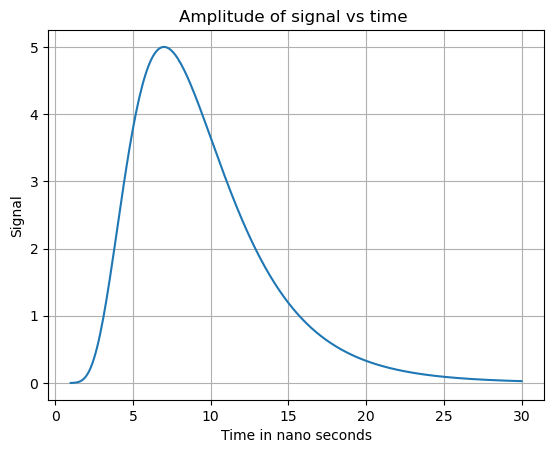

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time

def signal(A,t):
    #calculates the signal produced by HAWK's photomultiplier tubes give an amplitude and time
    power = -1/2*((math.log(t/7))/.45)**2
    return A* math.exp(power)

times = np.arange(1.,30.1,.1)

yaxis=[]
Amplitude = 5.
for i, timer in enumerate(times):
    yaxis = np.append(yaxis, signal(Amplitude, timer))

plt.plot(times,yaxis)
plt.xlabel("Time in nano seconds")
plt.ylabel("Signal")
plt.title("Amplitude of signal vs time ")
plt.grid()
plt.show()


(b) Write a function that integrates an arbitrary list of x and y data points using the trapezoidal rule. Use your function to integrate the lognormal signal. To check your answer, integrate the same data using a pre-existing integration package/function (for instance, numpy’s “trapz” function). 

In [3]:
#1b

def trap(yvals, xvals):
    #calculates trapizods and sums them to get the area under a graph given a list of x and y values
    data = []
    for i in range(len(xvals)-1):
        xdif = (xvals[i+1]-xvals[i])
        slope = (yvals[i+1]-yvals[i])/xdif
        rect = yvals[i] * xdif
        tri = slope * xdif
        trap = rect+tri #trapazoid math
        data = np.append(data, trap)
    int = sum(data)
    return int

def trap_2(y, x):
    h = (x[-1] - x[0])/ (len(x) -1) #calcs step size
    sum = h/2*(y[0]+y[-1]) # weights the first and last term to 1/2
    for i in range(1, len(y) -1):
        sum+= h*y[i] #calcs remaining terms
    return sum

def trap_3(y,x):
    h = (x[-1] - x[0])/ (len(x) -1)   #calcs step size 
    return h/2 * (y[0] + y[-1] +2*np.sum(y[1:-1])) #weights and sums all trapazoids

print(f"trapazoide calc = {trap_3(yaxis,times)}.")
# print(f"trapazoide as done in class = {trap_2(yaxis,times)}")
# print(f"trap calc = {trap(yaxis,times)}")
print(f"numpy trapazoide calc = {np.trapz(yaxis, times)}")


trapazoide calc = 43.5687127295044.
numpy trapazoide calc = 43.56871272950439


(c) Write a similar function utilizing Simpson’s rule. Note that this technique re- quires an odd number of data points! Should your function be given an even number of points, print an error message to the user. Your signal from part (a) contains an even number of points. Remove the last point, integrate your signal, and check for consistency with your previous answer. They should be fairly similar. 

In [4]:
def simp(y, xvals):
    if int(len(xvals)/2) != float(len(xvals)/2): #checks that xvals are even arrays
        print("wrong amount of elements")
        raise Exception("Number of elements must be odd") #error function
    h = (xvals[-1] - xvals[0]) / (len(xvals) -1)  #calc step size
    return h/3 * (y[0] + 4*np.sum(y[1:-1:2]) + 2*sum(y[2:-1:2]) + y[-1]) #sums terms and weights them acordingly

try:
    print(f"simpson rule calc = {simp(yaxis, times)}.") #given even terms
except Exception as ex:   #check for error 
    print(ex)
    
print(f"simpson rule calc = {simp(yaxis[0:len(yaxis)-1],times[0:len(times)-1])}.") #given odd terms 

wrong amount of elements
Number of elements must be odd
simpson rule calc = 43.56508486731377.


(d) Gamma rays are not the only astrophysical source of particle showers. Cos- mic rays form a significant background, triggering HAWC’s PMTs at rates of around 10,000 Hz! How long would it take your code to integrate 10,000 sig- nals using the trapezoidal rule? 

(Hint: Python’s `cProfile` module will make easy work of this task. However, a rough estimate is also fine (such as with your wristwatch or cellphone). You could time a single execution and multiply by 10,000, time 10,000 executions directly, or something in between.)

In [5]:

tic = time.time()  #starts timer

for i in range(10000):  #10,000 iterations
    trap_3(yaxis,times)
tok =time.time() #end timer

print(f"elapsed time = {tok-tic} seconds.") #shows difference in time


elapsed time = 0.2819342613220215 seconds.


Some additional information: the speed of numeric integration is not the limiting factor when analyzing HAWC’s PMT signals. Rather, the challenge lies in reading the PMT signals in a cost-effective manner. Although an oscilloscope would pro- duce an image much like the one you made in part (a), this would be too expensive to utilize for 1200 PMTs. Instead, a flash analog to digital converter (FADC) is used. While FADC’s are much less expensive, they also read the signal at a much lower resolution (as little as two data points per signal!). The experimental design is al- ways a trade-off between capability and cost.

## Problem 2: Romberg Integration

Use Romberg integration to calculate 

$$
\int_{0}^{\pi/2} \frac{d\theta}{1+\cos\theta}
$$

to 8 decimal places of accuracy, as determined from a relative error check. Print out the successive Romberg estimates as a way of showing your work. (Producing a structured printout may be the hard part!)

In [6]:
def func(x):
    return 1/(1+np.cos(x))  


def errcheck(exact,calc): #calcs relative error 
    return abs((exact-calc)/exact)


def trap_6(start,end,m,f):  #does the math for clean functions 
    x = np.linspace(start, end, 2**m) #creates x values
    h=(end - start)/(len(x)-1) #finds step size
    y=f(x) #calcs y values 
    return h/2 *(y[0]+y[-1]+ 2*np.sum(y[1:-1]))

    
def rom_7(start,end,f):    #deletes up to term (h^6)
    print("Romberg method removing up to the h^6 term")
    for m in range(1,50):
        sum1 = trap_6(start,end,m,f)
        sum2 = trap_6(start,end,m+1,f)
        sum3 = trap_6(start,end,m+2,f)
        sum4 = trap_6(start,end,m+3,f)
        ans = (6718464/4635365)*sum4-2861312/5959755*sum3+185572/5959755*sum2-17711/41718285*sum1
        print(f"for m={m} the integral is {ans}")
        if errcheck(1,ans) < 10**(-8):
            return ans, m
    print("couldn't get relative error within 10**(-8) in 50 instances")
    return None, m



def rom_8(start,end,f): #deletes up to h^2
    print("Romberg method removing up to the h^2 term")
    for m in range(1,50):
        sum1 = trap_6(start,end,m,f)
        sum2 = trap_6(start,end,m+1,f)
        ans = 4/3*sum2-1/3*sum1        
        print(f"for m={m} the integral is {ans}")
        if errcheck(1,ans) < 10**(-8):
            return ans, m
    print("couldn't get relative error within 10**(-8) in 50 instances")
    return None, m

def rom_9(start,end,f): #delets up to h^4
    print("Romberg method removing up to the h^4 term")
    for m in range(1,50):
        sum1 = trap_6(start,end,m,f)
        sum2 = trap_6(start,end,m+1,f)
        sum3 = trap_6(start,end,m+2,f)
        ans = 1/45*(64*sum3-20*sum2+sum1)
        print(f"for m={m} the integral is {ans}")
        if errcheck(1,ans) < 10**(-8):
            return ans, m
    print("couldn't get relative error within 10**(-8) in 50 instances")
    return None, m

def trap_7(start,end,f): #keeps all terms
    print("trapazoide method")
    for m in range(1,50):
        sum1 = trap_6(start,end,m,f)
        ans = sum1
        print(f"for m={m} the integral is {ans}")
        if errcheck(1,ans) < 10**(-8):
            return ans, m
    print("couldn't get relative error within 10**(-8) in 50 instances")
    return None, m



print(f"when using trap method {trap_7(0,np.pi/2,func)} \n")
print(f"when using romberg method with deleting up to order h^2 term {rom_8(0,np.pi/2,func)}\n")

print("EC")
print(f"when using romberg method with deleting up to h^4 term {rom_9(0,np.pi/2,func)}\n")

print("Test of method/skill")
print(f"when using romberg method with deleting up to h^6 term {rom_7(0,np.pi/2,func)}\n")


trapazoide method
for m=1 the integral is 1.1780972450961724
for m=2 the integral is 1.0223606702565675
for m=3 the integral is 1.0041789022922332
for m=4 the integral is 1.0009130197772473
for m=5 the integral is 1.000213915501666
for m=6 the integral is 1.000051803000293
for m=7 the integral is 1.0000127481020036
for m=8 the integral is 1.0000031621085455
for m=9 the integral is 1.000000787437994
for m=10 the integral is 1.0000001964749354
for m=11 the integral is 1.0000000490707621
for m=12 the integral is 1.0000000122617
for m=13 the integral is 1.0000000030646765
when using trap method (1.0000000030646765, 13) 

Romberg method removing up to the h^2 term
for m=1 the integral is 0.9704484786433658
for m=2 the integral is 0.9981183129707885
for m=3 the integral is 0.9998243922722521
for m=4 the integral is 0.999980880743139
for m=5 the integral is 0.9999977654998351
for m=6 the integral is 0.9999997298025737
for m=7 the integral is 0.9999999667773928
for m=8 the integral is 0.999999

## Problem 3 Runge-Kutta Method

(a) Write your own `rk2` ODE solver (see the Lecture-2 notebook). Make it general: have it call a function $f(t,y)$ that you want to integrate (recall, we defined $f(t,y)=\frac{dy}{dt}$), and make the total time and step size easily configurable. 

Try it out first by integrating 

$$f(t)=\sin(\omega t)$$ 

with the initial value of $y=0$ at $t=0$ (set $\omega=1.0$), and let it run forward in time for at least 20 periods. Pick a reasonable $h$ (thereby the total number of time points over the 20 periods) to display the results well. Then, use a canned solver like `odeint` in Scipy. Plot the two results together as a function of time, along with the exact analytic result (you can use the numpy trig function). How do these all compare? Explain why the plot looks the way it does -- specifically the maximum and minimum values of the function.


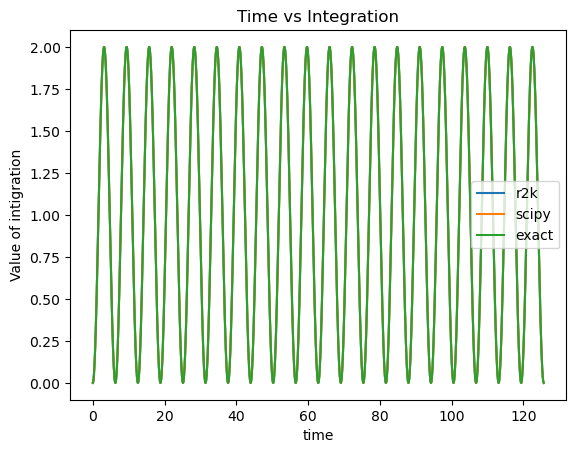

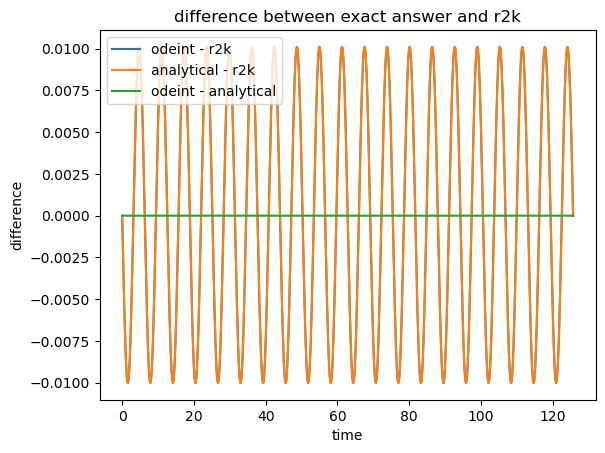

In [7]:
import numpy as np
import scipy
import math
import matplotlib.pyplot as plt

def func(t,y):
    w=1
    return np.sin(w*t)

def func_3(t,y):
    return 1+y**2+t**3

def r2k(start, end, step, initial, function):
    y0= initial
    x0=start
    n = int((end-start)/step)

    for i in range(1,n+1):
        k1 = step * function(x0, y0)
        k2 = step * function(x0 + step/2, y0 + k1/2)
        y0 += k2
        x0 += step

    return y0


def r2k_v2(t1,t2,function, initial, steps):
    t = np.linspace(t1,t2,steps) #creates x terms
    h = (t2-t1)/(steps-1) # finds step size
    y = initial
    yaxis= [y] 
    times= [t[0]]
    for i in range(1,len(t)):
        k1 = h * function(t[i],y)
        k2 = h * function(t[i]+h/2, y + k1/2)
        y += k2
        yaxis= np.append(yaxis,y)
        times= np.append(times,t[i])
    return y, yaxis, times

def r4k(t1,t2,function, initial, steps):
    # r4k is just for fun
    t = np.linspace(t1,t2,steps)
    h = (t2-t1)/(steps-1)
    y = initial
    yaxis = [y]
    times = [t[0]]
    for i in range(1,len(t)):
        k1 = h * function(t[i],y)
        k2 = h * function(t[i]+h/2, y + k1/2)
        k3 = h * function(t[i]+h/2, y + k2/2)
        k4 = h * function(t[i]+h, y + k3)
        y += (k1 +2*k2+2*k3+k4)/6
        yaxis= np.append(yaxis,y)
        times= np.append(times,t[i])

    return y, yaxis, times

# print(r2k(0,40*np.pi,.001,0,func))
# print(r2k_v2(0,40*np.pi,func,0,100000)[0])
# print(r4k(0,40*np.pi,func,0,100000)[0])

N = 12500 # creates steps if around .01

plt.plot(r2k_v2(0,40*np.pi,func,0,N)[2],r4k(0,40*np.pi,func,0,N)[1], label="r2k")

value = 2*np.pi/10000
t= np.linspace(0,40*np.pi,N)
# a = scipy.integrate.odeint(func, .1,t)
a = scipy.integrate.odeint(func,0,t, tfirst=True)
plt.plot(t, a, label="scipy")
plt.xlabel("time")
plt.ylabel("Value of intigration")
plt.title("Time vs Integration")
w=1
b = (1-np.cos(t)/w)
plt.plot(t,b,label="exact")
plt.legend()
plt.show()

dif = a[:,0]-r2k_v2(0,40*np.pi,func,0,N)[1]
# print(np.shape(r2k_v2(0,40*np.pi,func,0,1000)[1]))
# print(np.shape(a[:,0]))
dif2 = b-r2k_v2(0,40*np.pi,func,0,N)[1]
dif3= a[:,0] - b


plt.plot(t,dif, label="odeint - r2k") # not a needed graph but recommended in office hours
plt.plot(t,dif2, label="analytical - r2k")
plt.plot(t,dif3, label="odeint - analytical")
plt.xlabel("time")
plt.ylabel("difference")
plt.title("difference between exact answer and r2k")
plt.legend()
plt.show()


The functions all look the exact same when seen from the first plot but when graphing the difference we can see that odient and the analytical are the same but the r2k method differs by around .01 at the min and max values of the plot. It seems that the value is under counted when going down and over counted on the way back up. The plot has the shape it does because the integral of sin is a cos function therefore, when the plot hits its max value it is evaluating when cos(t) = 0 about to be negative, when it begins counting the negatives the value decreases. The reason the value overestimates on the way up the curve is because it is a non constant curve so when calculating the slopes it is taking the midpoint between a non linear change, I believe this cancles out when going down making the same error in reverse. With the step sizes being so small and the osscilations going from prositive to negative it doesn't allow the error to compound over a large number of periods. In addition, one small error without the oscilation would be compounded due to the value of y_n+1 being calculated with y_n.

(b) Next, try out your solver with the function $$f(t,y)=1 + y^2+t^3$$ with start values of $(t_0,y_0)=(1.,-4.)$ and let it run to $t=2.0$ (*i.e.,* 1 second). Pick a reasonable number of steps, such as 100. Plot $y$ as a function of time  and compare with the result from the canned odeint solver.


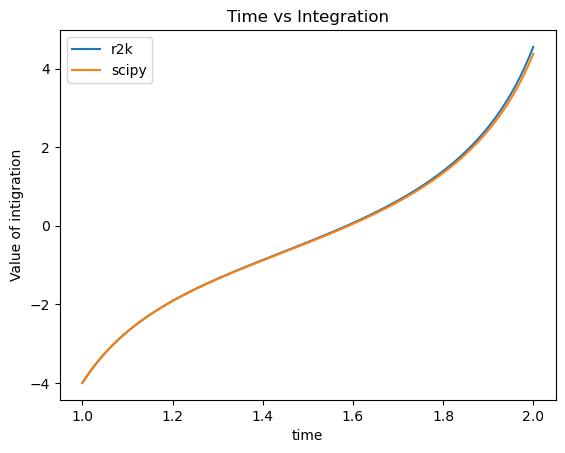

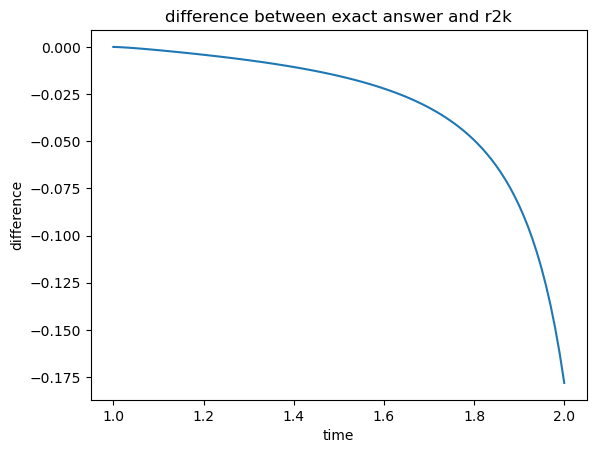

In [8]:
# print(r2k_v2(1.,2.,func_3,-4.,500))
# print(r4k(1.,2.,func_3,-4.,500))

plt.plot(r2k_v2(1,2,func_3,-4,100)[2],r2k_v2(1,2,func_3,-4,100)[1], label="r2k")


t_2= np.linspace(1.,2.,100)

a = scipy.integrate.odeint(func_3, -4,t_2, tfirst=True)
plt.plot(t_2,a, label="scipy")
plt.xlabel("time")
plt.ylabel("Value of intigration")
plt.title("Time vs Integration")
plt.legend()
plt.show()
# print(a)


dif = a[:,0]-r2k_v2(1,2,func_3,-4,100)[1]

plt.plot(t_2,dif)  # not a needed graph but recommended in office hours
plt.xlabel("time")
plt.ylabel("difference")
plt.title("difference between exact answer and r2k")
plt.show()


As mentioned in part a, the non linear increase in slope would cause an over count and as seen in the 2 plots above. Due to the slope always being positive and non constant this would result in compounding error that never gets balanced out, in addition the calculation uses the previous calculated values for the calculation leading to compunding error seen here.

## Problem 4

Look again at what we did in class for the simple pendulum with a periodic driving force and damping. You may use that code, or write your own if you prefer, to explore.

a) With zero driving force and zero or small damping, start the system at $\theta=0$ and gradually increase the initial value of $\dot{\theta}$. Can you produce "over-the-top" motions?

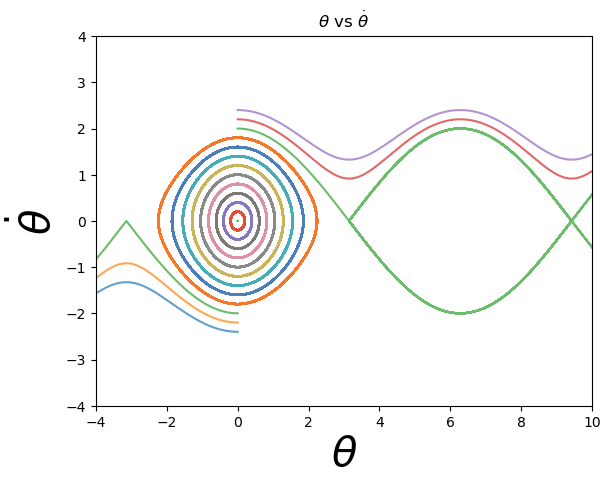

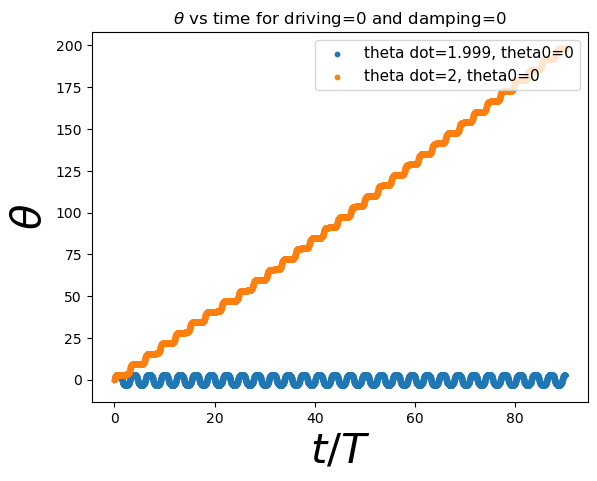

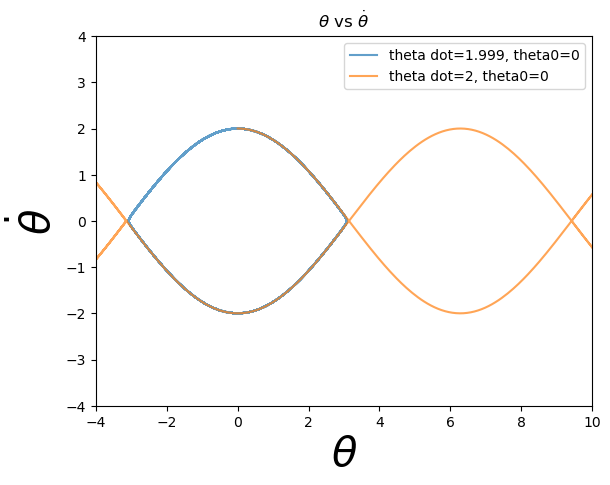

In [9]:
# %matplotlib inline
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

def spendfield(the, thedot, b, f, omega, time):
    return thedot, -np.sin(the)-b*thedot+f*np.cos(omega*time)

def spendfield_2(Y, time, b, f, omega):
    return Y[1], -np.sin(Y[0])-b*Y[1]+f*np.cos(omega*time)

def graphing_2(b,f,omega, the, tdot, xrange=[-4,10], xbt=True, tbtleg=True, xbtleg=True, tbt=True):
    
    if type(tdot) == int or type(tdot) == float:  # if the imput is not in an array it puts it in one
        tdot = [tdot]
    if type(the) == int or type(the) == float:
        the = [the]
    
    if xbt==True:    # does the graphing for theta by time only if wanted 
        T=2.*np.pi/omega
        steps_per_T=50. #change this and explore!!!!
        h=T/steps_per_T
        ttot=90.*T
        t=np.arange(0.,ttot,h)

        for j in range(len(the)):
            for i in range(len(tdot)):
                Y = scipy.integrate.odeint(spendfield_2, [the[j], tdot[i]], t, args=(b,f,omega))
                plt.scatter(t/T, Y[:,0], 10, label=f"theta dot={tdot[i]}, theta0={the[j]}")
        plt.xlabel('$t/T$', size=30)                 #labels
        plt.ylabel('$\\theta$',size=30)
        if xbtleg==True:   #legends can be a bit much with lots of data
            plt.legend(loc='upper right',prop={'size':11})
        plt.title(f"$\\theta$ vs time for driving={f} and damping={b}")
        plt.show()

    T=2.*np.pi/omega
    steps_per_T=120 
    h=T/steps_per_T
    #
    ttot=91.*T
    t=np.arange(0.,ttot,h)
    
    if tbt==True:   # I like having toggles
        for j in range(len(the)):
            for i in range(len(tdot)):
                Y = scipy.integrate.odeint(spendfield_2, [the[j], tdot[i]], t, args=(b,f,omega))
                plt.plot(Y[:90*steps_per_T,0], Y[:90*steps_per_T,1], label=f"theta dot={tdot[i]}, theta0={the[j]}", alpha = 0.7)
        plt.xlabel("$\\theta$", size=30)
        plt.ylabel("$\dot{\\theta}$", size=30)
        plt.ylim(-4,4)
        plt.xlim(xrange[0],xrange[1])
        if tbtleg==True:
            plt.legend()
        if b != 0 or f != 0:     # if it doesn't have a changed b or f value it will label as just phase
                plt.title(f"phase plot for force={f} and damping={b}")
        else:
            plt.title("$\\theta$ vs $\\dot{\\theta}$")
        plt.show()
    

tdot = np.arange(-2.4,2.51,.2)
graphing_2(0,0,1,0,tdot,xbt=False, tbtleg=False)
graphing_2(0,0,1,0,[1.999,2])

The over the top motion occurs for theta dot grater than or equal to 2, before this point the particle will stay in the orbit it begain in but after it hits 2 it goes around all future orbits centered at values of 2n*pi

b) Now make plots in phase space: make your own version of the plot in your textbook shown in figure 15.4 (p368) using your pendulum code and adjusting the parameters in whatever way you think is the clearest. Describe each of the main features. Explore what happens with the damping the driving forces at various strengths. 

For the force, the phase plot getts pulled further and further to the right as f approaches 1. It lessens the required value needed for all points to be over the top until all points are over the top. This was done with t=0 and drag = 0. for drag with force set to 0, from an early point such as b=.2 the points all begin to fall into the center at least at the lower initital theta dot values. I noticed at around .8, there is a dramatic fall to the center for values from the higher initial theta dot values. When b=.3 and f=.3, there are terms that still fall into the center but the outer radius is still able to be over the top.

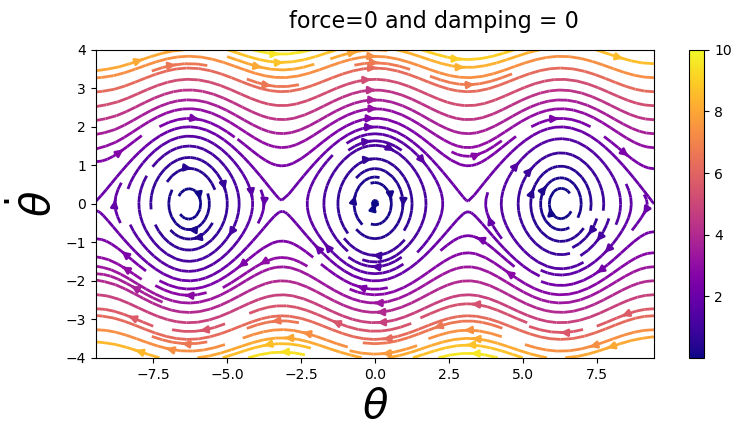

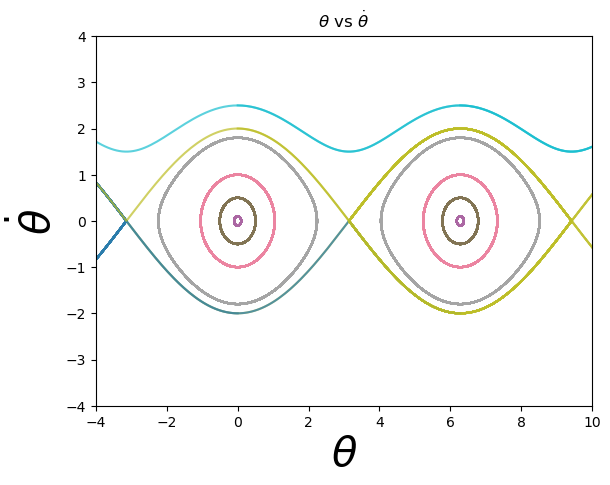

In [10]:
def graphing(b,f,omega,time):

    thedot, the = np.mgrid[-4.:4.:1000j, -3.*np.pi:3.*np.pi:1000j] #creates a grid of arrays ranging from -4,4 with 1000 complex steps and from -3pi to 3pi with 1000 complex steps
    U,V = spendfield(the, thedot, b, f, omega, time)  # u,v are velocites for the plot
    E=0.5*pow(thedot,2)+(1.-np.cos(the))
    fig = plt.figure(1,[9.,4.])
    ax=fig.gca()
    #fig0, ax0 = plt.subplots()
    strm = ax.streamplot(the, thedot, U, V, color=E, linewidth=2, density=1.5, cmap=plt.cm.plasma) # not using steamplot is unlegable
    fig.colorbar(strm.lines)
    fig.suptitle(f'force={f} and damping = {b}', fontsize=16)
    ax.set_xlabel('$\\theta$', size=30)                 #labels
    ax.set_ylabel('$\\dot{\\theta}$',size=30)
    plt.show()
    return


graphing(0,0,1,0)
graphing_2(0,0,1,[0,2*np.pi,-2*np.pi],[-2,-1,-.5,-.1,.1,.5,1,1.8,2,2.5],xbt=False, tbtleg=False)




The main fetures of these phase plots are the orbits we see around values of 2n pi. When there is no driving or damping force it can be seen that the particle stays in the initial orbit for values of theta dot less than 2. when the value of theta dot reaches or exseeds 2 it falls into and out of each orbit as it continues its path. It does seem with enough time that the path may eventually begin to fall back to previous orbits but it never seems to become stuck as was predicted from part a.

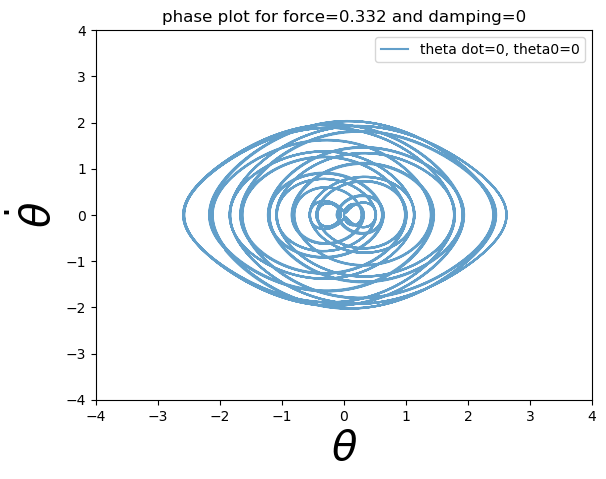

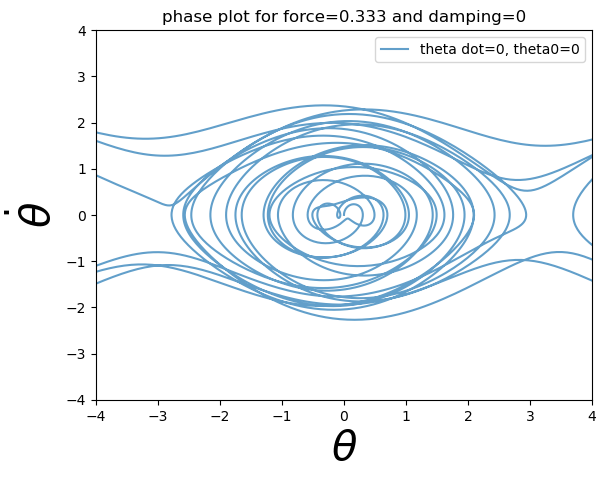

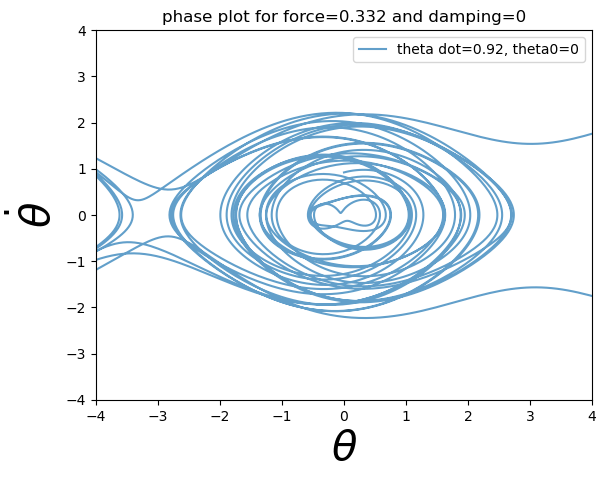

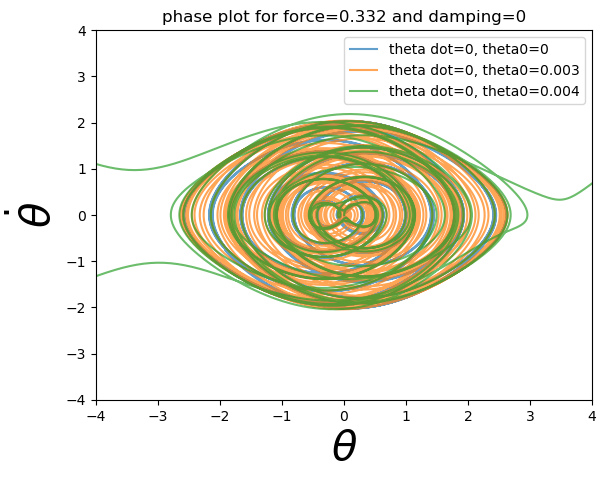

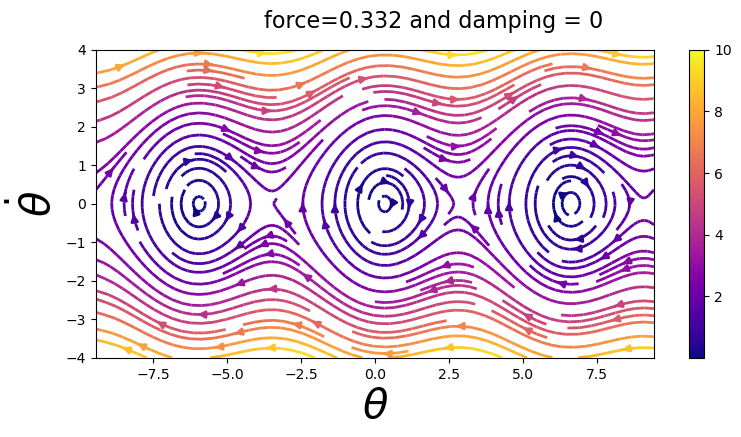

In [11]:
# graphing_2(0,0,1,0,tdot,xbt=False,tbtleg=False)
graphing_2(0,.332,1,0,0,[-4,4],tbtleg=True,xbt=False)
graphing_2(0,.333,1,0,0,[-4,4],tbtleg=True,xbt=False)
graphing_2(0,.332,1,0,.92,[-4,4],tbtleg=True,xbt=False)
graphing_2(0,.332,1,[0,.003,.004],0,[-4,4],tbtleg=True,xbt=False)
graphing(0,.332,1,0)


In these plots we can see the force just below it is able to achive over the top motion with no prior kenetic or potential energy and how it will achive over the top motion with just a little extra energy added to they system.

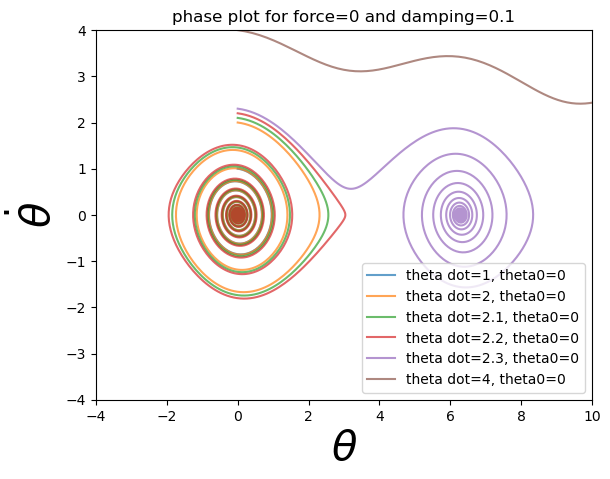

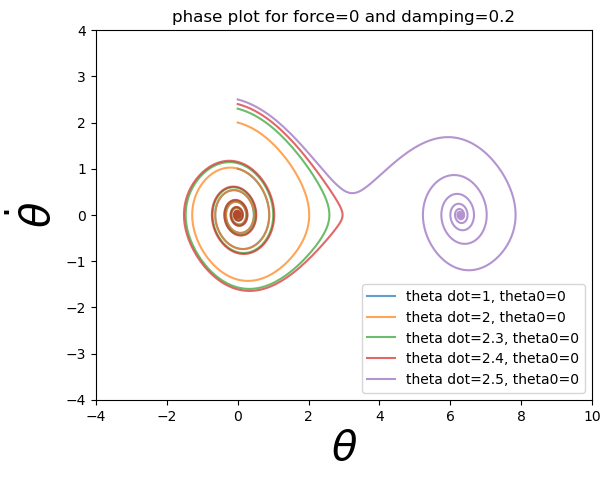

In [12]:
graphing_2(.1,0,1,0,[1,2,2.1,2.2,2.3, 4],[-4,10],tbtleg=True,xbt=False)
graphing_2(.2,0,1,0,[1,2,2.3,2.4,2.5],[-4,10],tbtleg=True,xbt=False)



In this plot, it shows that with a damping term and no initial theta, the terms a fall into the middle on the first orbit for values of theta dot = 2 + 2*b, and when they make it over for higher values they fall into a future orbit.

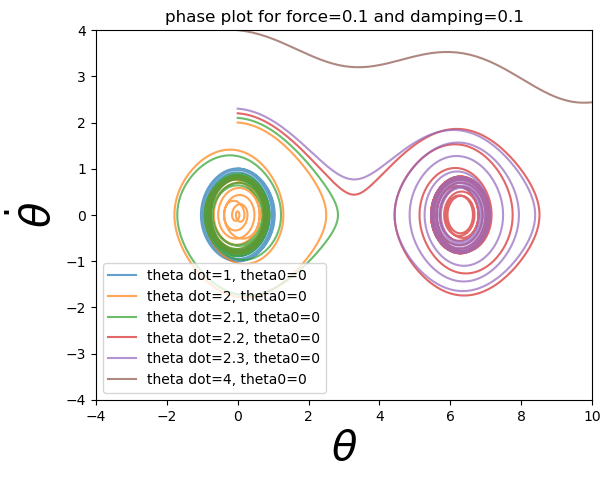

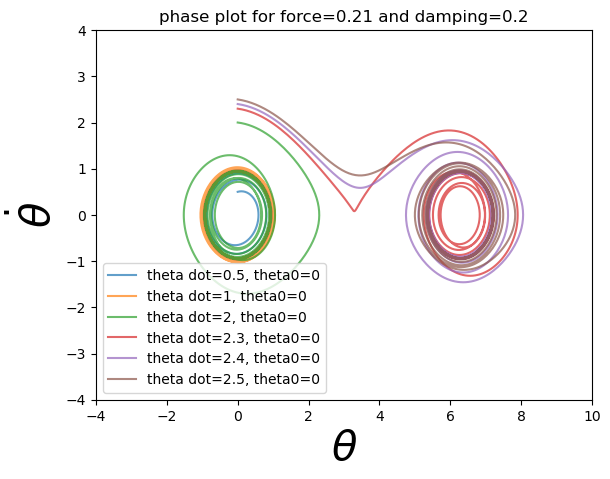

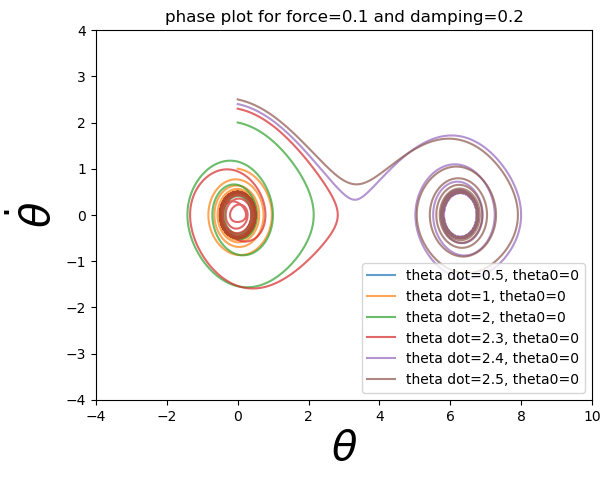

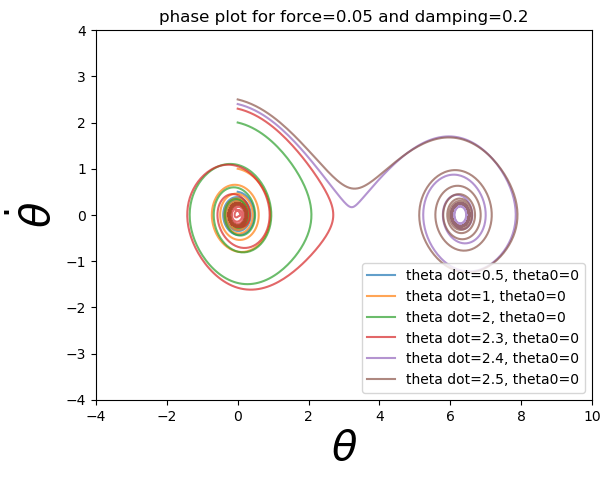

In [13]:
graphing_2(.1,.1,1,0,[1,2,2.1,2.2,2.3, 4],[-4,10],tbtleg=True,xbt=False)
graphing_2(.2,.21,1,0,[.5,1,2,2.3,2.4,2.5],[-4,10],tbtleg=True,xbt=False)
graphing_2(.2,.1,1,0,[.5,1,2,2.3,2.4,2.5],[-4,10],tbtleg=True,xbt=False)
graphing_2(.2,.05,1,0,[.5,1,2,2.3,2.4,2.5],[-4,10],tbtleg=True,xbt=False)


After messing with the values of b and f, some interesting behavior begins to arise, for b=f, its seems that the values never stop but do approach a final velocity they stay at except for when theta dot = 2 where it falls to a lower orbit range for a small period before recovering. values of b>f or even for values of f slightly larger than b, the particles fall into the orbits as seen in the previous graphs but never stop, they just hit a point where they stay at that range of the orbit.

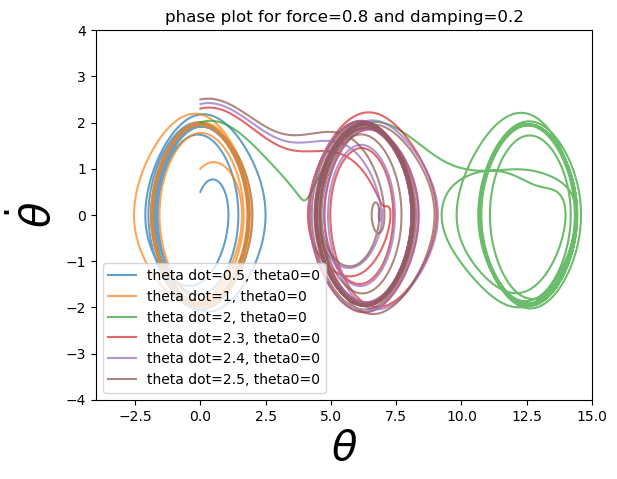

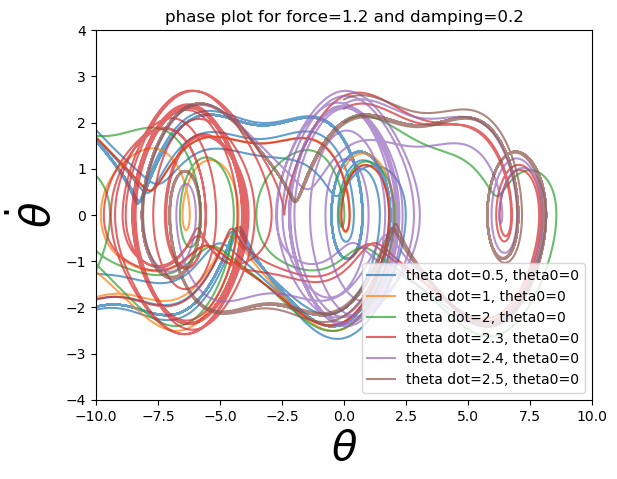

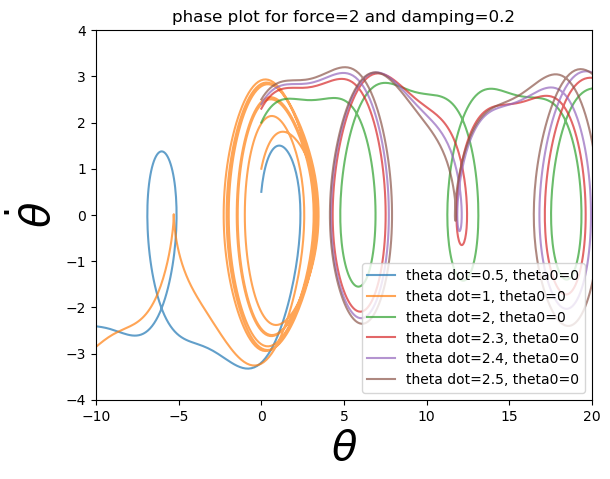

In [14]:
graphing_2(.2,.8,1,0,[.5,1,2,2.3,2.4,2.5],[-4,15],tbtleg=True,xbt=False)
graphing_2(.2,1.2,1,0,[.5,1,2,2.3,2.4,2.5],[-10,10],tbtleg=True,xbt=False)
graphing_2(.2,2,1,0,[.5,1,2,2.3,2.4,2.5],[-10,20],tbtleg=True,xbt=False)

For this set of graphs, we can see what happens for f>b. In the first plot, lower values of thetadot are able to go further in the first orbit, higher values stop at higher ranges of the seconds orbit and theta dot = 2 is able to make it all the way to the third orbit. The second graph shows that with a force too high it may get slingshot back into a previous orbit and cycle around that one instead. The third plot shows that with high enough force the particles may just fly from orbit to orbit with no end in sight if initial condtions are just right.

c) Read section 15.2.1 and try to find at least one of the types of complex behaviors described there in your oscillator. If you need a start, you might find section 15.2.2 helpful. Show and explain your results. (Some of you might want to pursue this topic further in your project.)

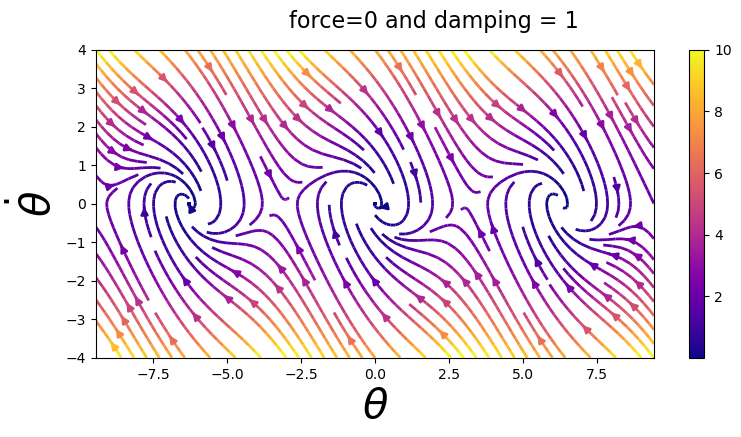

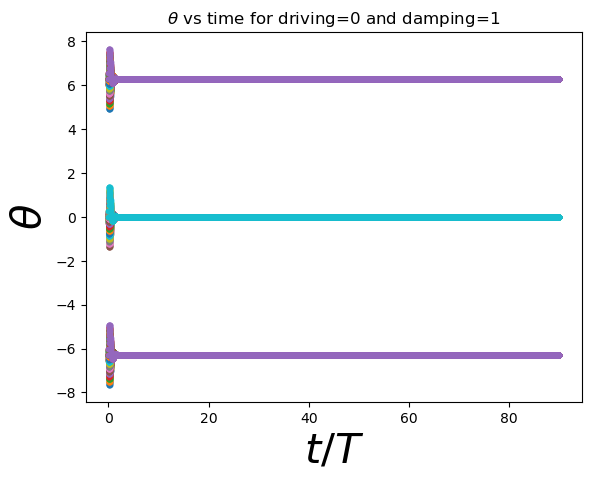

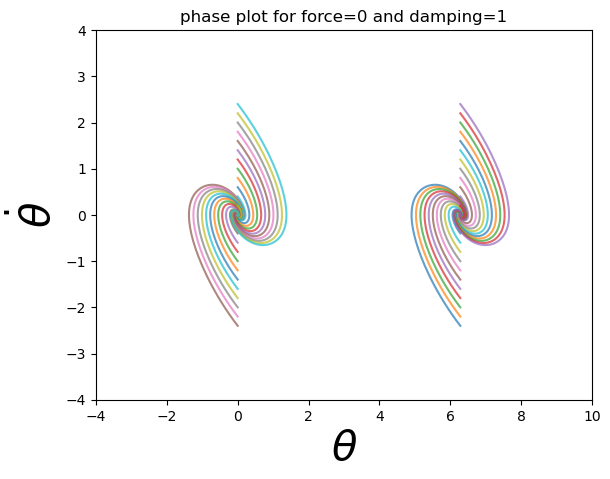

In [15]:
graphing(1,0,1,0)
thetaval = np.arange(-2*np.pi,2*np.pi+.001,2*np.pi)
graphing_2(1,0,1,thetaval,tdot,xbt=True,xbtleg=False, tbtleg=False)


This plot is an example of a predictable attractor, the orbits are attracts to n*2pi for all n and this leads to the motion stopping when it falls into these orbits, the starting position is not very important for this plot as it seems all will fall into an orbit sooner or later, this is with b=1 and f=0 so this is just a damping term causing the motion to stop


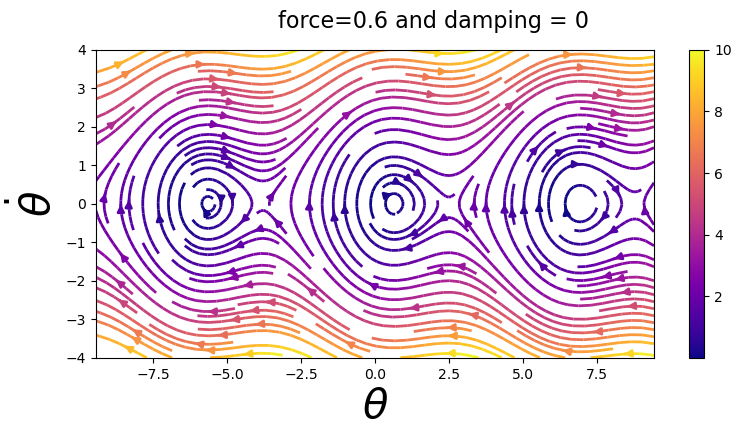

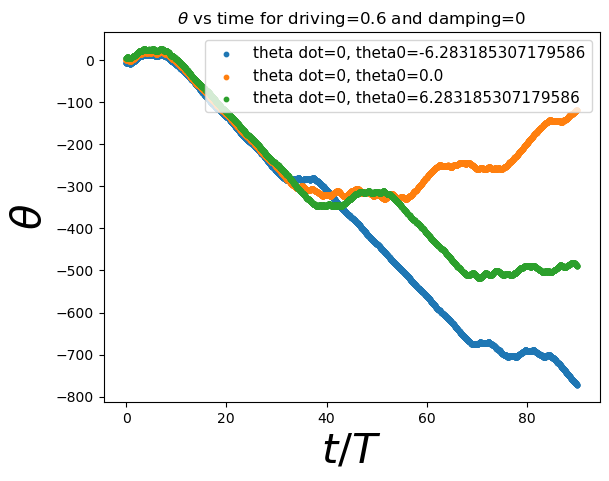

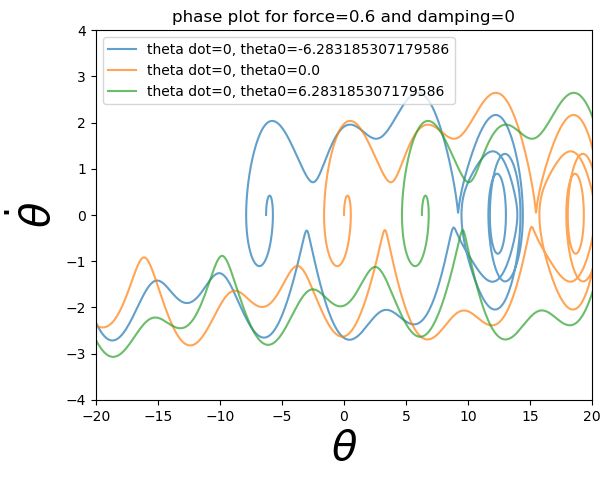

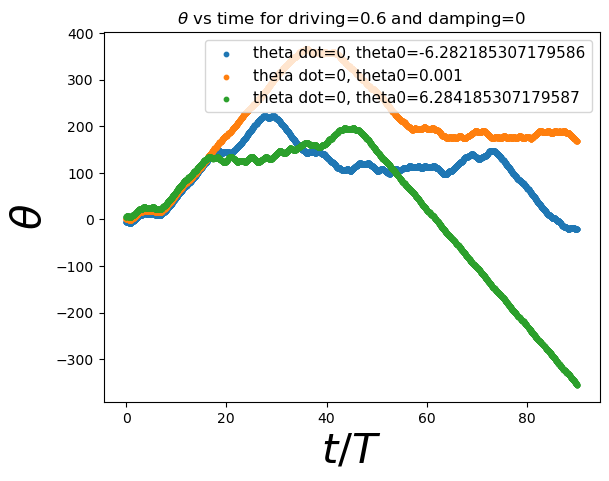

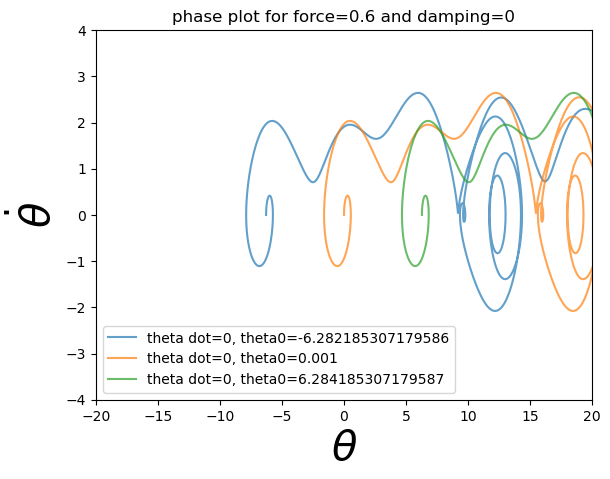

In [22]:
graphing(0,.6,1,0)
graphing_2(0,.6,1,thetaval,0,[-20,20])
graphing_2(0,.6,1,thetaval+.001,0,[-20,20])

in the first set of plots the driving force is not enough to overcome the all levels of the orbit as the values closest to n*2pi are still stuck in their orbits. The second plot set adds .001 to the starting theta value and shows the chaotic nature of the plots by varrying the starting values slightly. 

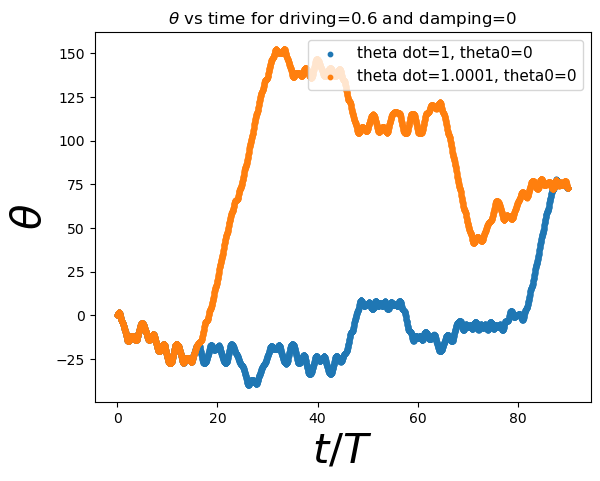

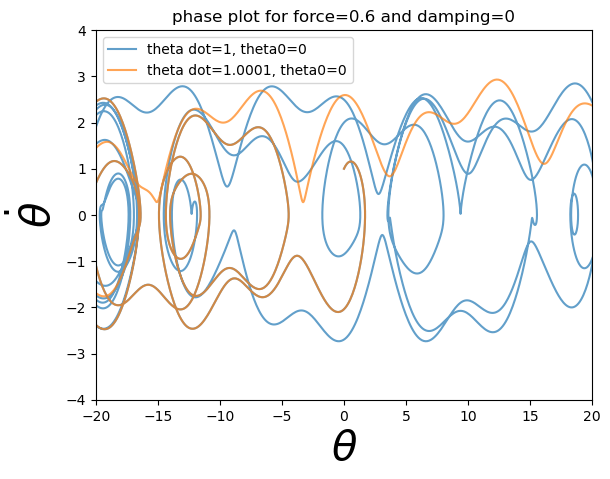

In [24]:
graphing_2(0,.6,1,0,[1,1.0001],[-20,20])

This set of plots follow the b and f for the previous set further showing the butterfly effect of the system by instead changing theta dot by .001 and showing how the paths varry greatly under such a small initial condition change.

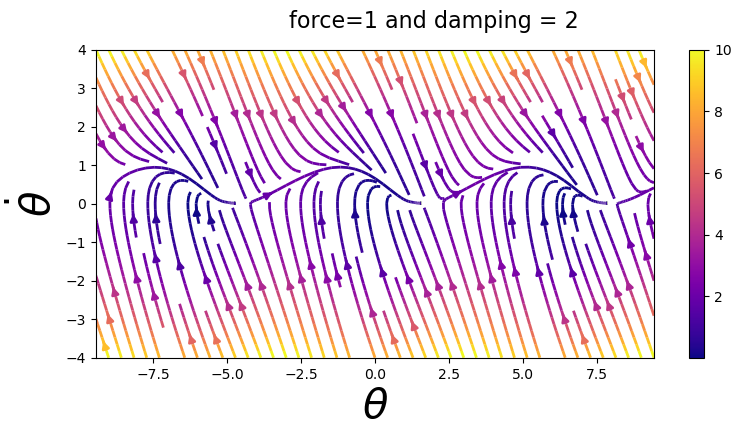

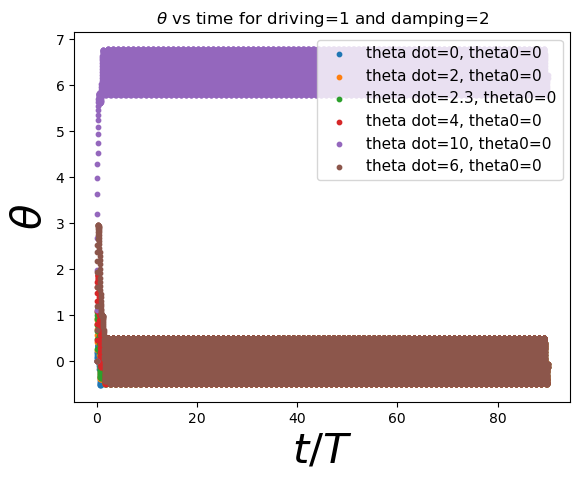

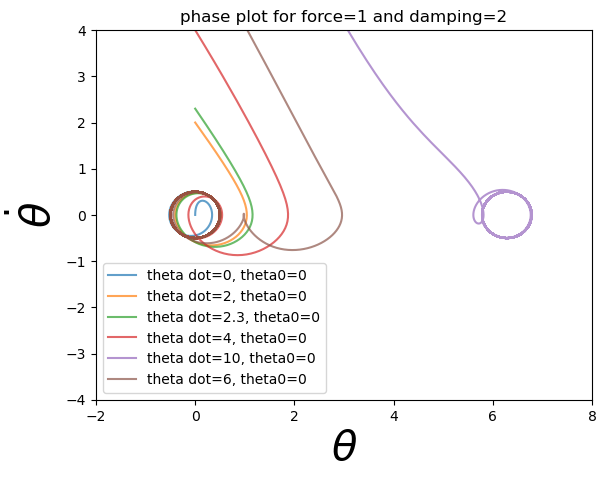

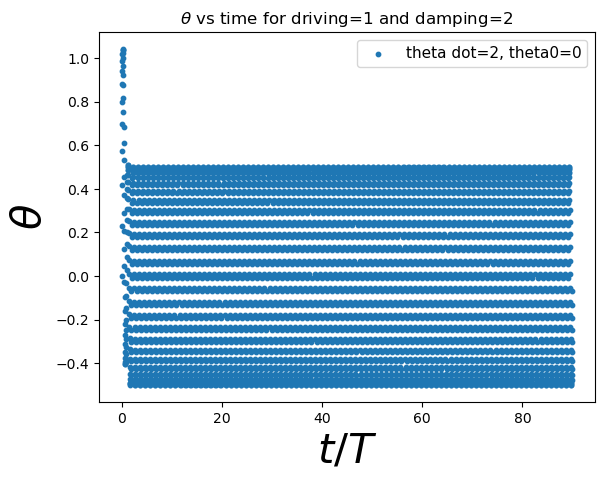

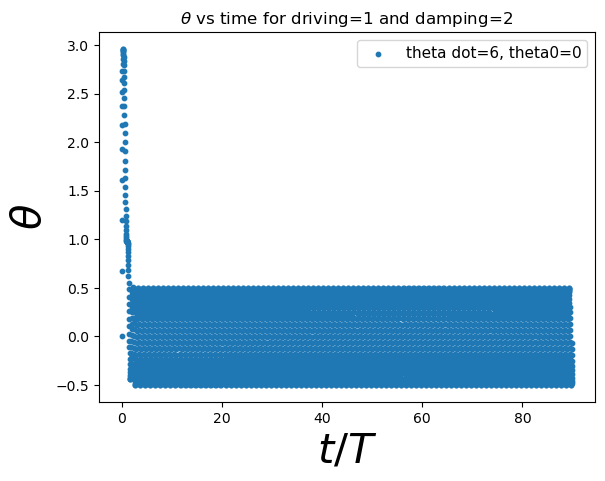

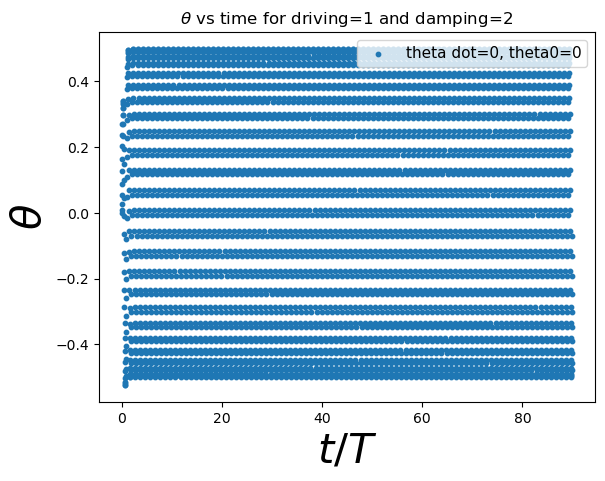

In [17]:
graphing(2,1,1,0)
# graphing_2(2,1,1,0,0,[-20,20])
graphing_2(2,1,1,0,[0,2,2.3,4,10,6],[-2,8])
graphing_2(2,1,1,0,2,tbt=False)
graphing_2(2,1,1,0,6,tbt=False)
graphing_2(2,1,1,0,0,tbt=False)

These plots show a what happens when you have to high damping and all initial values get funneled into their initial orbits. I don't think this displays any abnormal behavor, this is just the pendulums staying in motion at a specific orbit. It can be seen that all values of theta dot fall or rise to the closest orbit and they stay in the oscillation for all periods after falling in each ranging from theta = -.5 and .5. You could say this is a predictable attractor that is never reach as they just orbit the point.

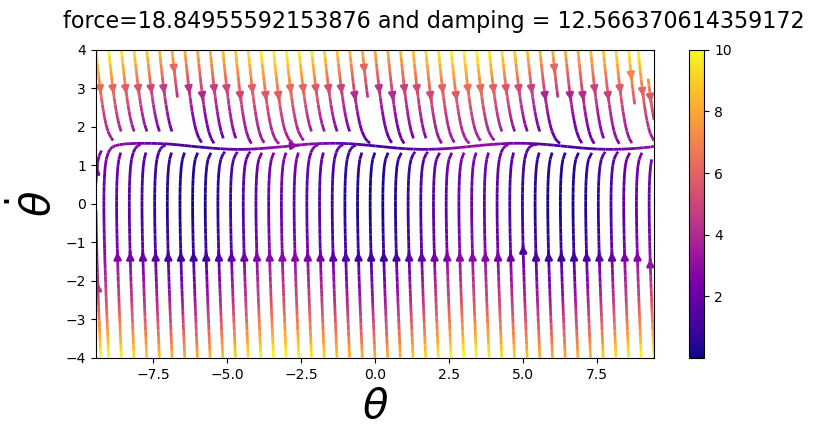

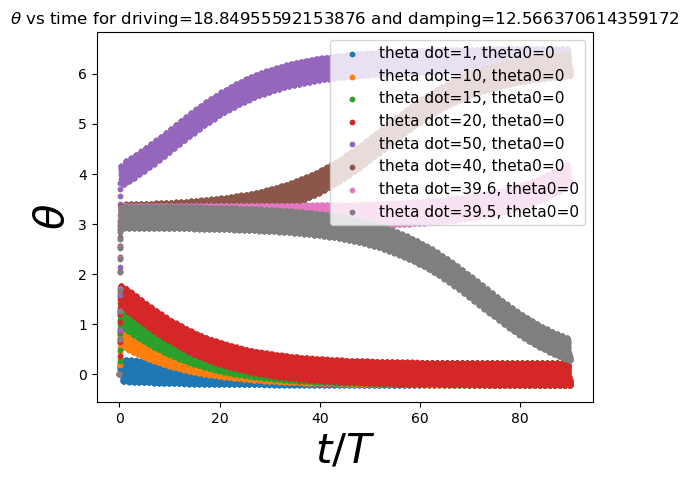

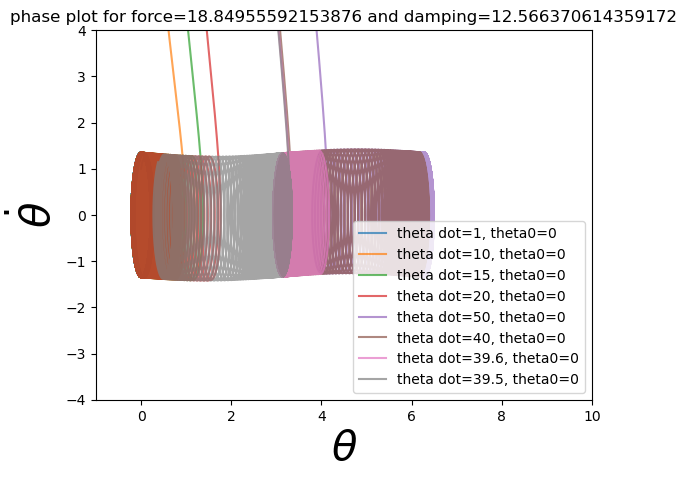

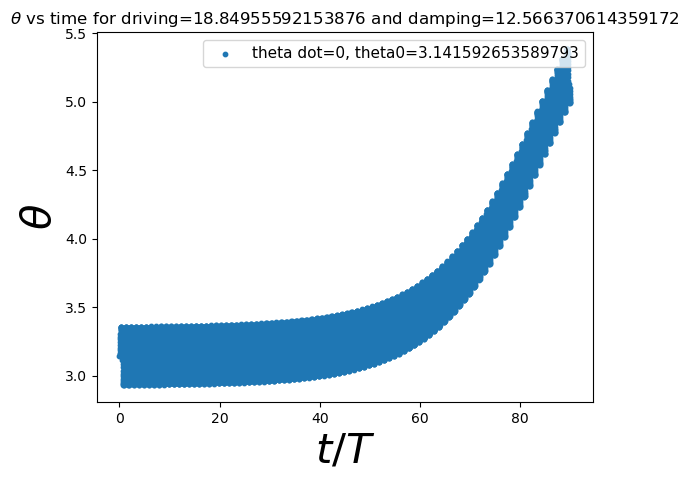

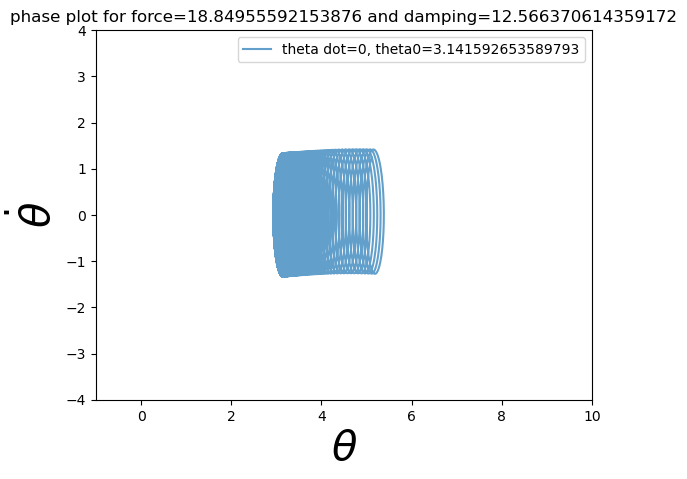

In [18]:
graphing(4*np.pi,6*np.pi,2*np.pi,1)
# graphing_2(4*np.pi,6*np.pi,2*np.pi,0,tdot,[-1,1],xbtleg=False,tbtleg=False)
graphing_2(4*np.pi,6*np.pi,2*np.pi,0,[1,10,15,20,50,40,39.6,39.5],[-1,10],tbtleg=True,tbt=True)
graphing_2(4*np.pi,6*np.pi,2*np.pi,np.pi,0,[-1,10],tbtleg=True,tbt=True)


This is a stronger version of the plot set shown before with the force and damping at integer multiples of 2pi, here we can see the strength of the attractors at a much higher weight where the orbit around 0 pulls values up to theta dot = 39.5 into its orbit but it takes a much longer time to stabalize around the point than the smaller values just .5 away from it. This plot almost seems to have an attractor at pi but that orbit seems weaker than the orbits of 2n*pi. The final 2 plots explore this further by putting a particle at pi with 0 initial velocity and while it seems to orbit it for a little, it is slowly drawn to the orbit at 2pi.